In [1]:
using LinearAlgebra
using SparseArrays
using Plots

In [2]:
function arnoldi(A, u, m)
    n = size(A, 1)
    Q = zeros(n, m+1)
    H = zeros(m+1, m)
    Q[:, 1] = u / norm(u)
    for j in 1:m
        v = A*Q[:, j]
        for i in 1:j
            H[i, j] = Q[:, i]' * v
            v -= H[i, j] * Q[:, i]
        end
        H[j+1, j] = norm(v)
        Q[:, j+1] = v / H[j+1, j]
    end
    Q, H
end

arnoldi (generic function with 1 method)

In [3]:
n = 100
M = 29
λ =  [i+10 for i in 1:n]
A_ = randn(n, n)
A = UpperTriangular(A_) - diagm(diag(A_)) + diagm(λ)
b = randn(n, 1);

In [4]:
# Instead of building up the Krylov matrices, using Arnoldi iteration to generate equivalent orthonormal vectors
M = 60
Q, H = arnoldi(A, b, M)
res = zeros(M, 1)
for m in 1:M
    s = vcat(norm(b), zeros(m, 1))
    z = H[1:m+1, 1:m] \ s
    x = Q[:, 1:m] * z
    res[m] = norm(b - A*x)
end

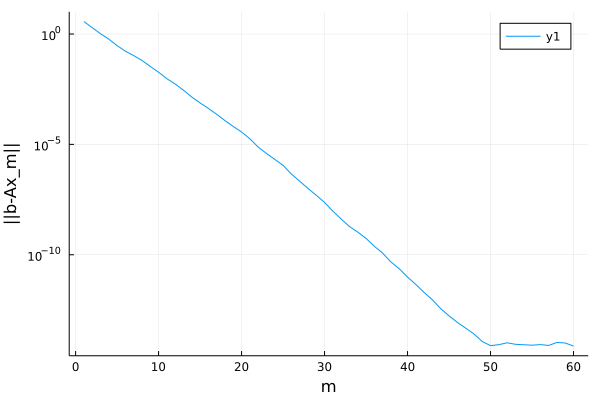

In [5]:
# The columns of Km are becoming near-parallel → numerical cancellation
plot(1:M, res, yaxis=:log, xlabel=:"m", ylabel=:"||b-Ax_m||")

In [6]:
## Magic matrix
A = [
    35     1     6    26    19    24;
     3    32     7    21    23    25;
    31     9     2    22    27    20;
     8    28    33    17    10    15;
    30     5    34    12    14    16;
     4    36    29    13    18    11
];
# Seed vector
u = randn(6, 1);
q = u / norm(u);


In [7]:
Aq = A * q;
v = Aq - (q' * Aq) .* q
Q = hcat(q, v/norm(v))

Aq = A * Q[:, 2];
v = Aq - (Q[:,1]' * Aq) .* Q[:, 1] - (Q[:,2]' * Aq) .* Q[:, 2]
Q = hcat(Q, v/norm(v));
norm(Q'*Q - I)

3.9508378061618646e-16

In [8]:
Q

6×3 Matrix{Float64}:
  0.0343782   0.275397   -0.554577
  0.0827853   0.207364   -0.644727
 -0.796438   -0.0341695  -0.322176
  0.585315   -0.277836   -0.357802
 -0.0883372  -0.728697   -0.113335
 -0.0851689  -0.521342   -0.179185

In [9]:
K = [u A*u A*A*u]

6×3 Matrix{Float64}:
  0.0946905   22.0436  -2298.37
  0.228022    14.6198  -2581.48
 -2.19369     24.8069  -2496.86
  1.61218    -43.7946   -539.831
 -0.243314   -58.4184   -422.051
 -0.234587   -41.0313   -738.318

In [10]:
QK = hcat(Q, K)

6×6 Matrix{Float64}:
  0.0343782   0.275397   -0.554577   0.0946905   22.0436  -2298.37
  0.0827853   0.207364   -0.644727   0.228022    14.6198  -2581.48
 -0.796438   -0.0341695  -0.322176  -2.19369     24.8069  -2496.86
  0.585315   -0.277836   -0.357802   1.61218    -43.7946   -539.831
 -0.0883372  -0.728697   -0.113335  -0.243314   -58.4184   -422.051
 -0.0851689  -0.521342   -0.179185  -0.234587   -41.0313   -738.318

In [11]:
rank(QK)

3

In [12]:
Q, H = arnoldi(A, u, 5);
Q

6×6 Matrix{Float64}:
  0.0343782   0.275397   -0.554577  -0.297413  -0.551395    -0.472153
  0.0827853   0.207364   -0.644727   0.613333   0.396316     0.035083
 -0.796438   -0.0341695  -0.322176  -0.256285   0.0176883    0.441278
  0.585315   -0.277836   -0.357802  -0.39615    0.00601256   0.543342
 -0.0883372  -0.728697   -0.113335   0.456409  -0.489746    -0.0139017
 -0.0851689  -0.521342   -0.179185  -0.323176   0.546532    -0.53451

In [13]:
H

6×5 Matrix{Float64}:
 -12.6227  12.339     7.85993   5.92687  19.5554
  30.636    9.77247  46.2171    3.44578  -0.0693932
   0.0     48.7857   86.1268    6.62163   0.224409
   0.0      0.0      10.0163    2.55995   3.92287
   0.0      0.0       0.0      31.624    24.6434
   0.0      0.0       0.0       0.0       1.27543